In [3]:
import numpy as np
import os

# Path to the directory where the unzipped data is located
data_dir = '/project/vil_baek/data/physics/original_ns/Navier-Stokes'

# List all files in the directory
file_list = sorted([os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.npy')])

# Load the first file as an example
data = np.load(file_list[0])

# Print shape and information
print(f"Shape of the data: {data.shape}")
print(f"File loaded: {file_list[0]}")

# Extracting velocity (u), velocity (v), and pressure (p) from the data
# u -> data[:,:,0::3], v -> data[:,:,1::3], p -> data[:,:,2::3]

u = data[:, :, 0::3]  # Velocity in x direction
v = data[:, :, 1::3]  # Velocity in y direction
p = data[:, :, 2::3]  # Pressure

print(f"Velocity in x direction (u) shape: {u.shape}")
print(f"Velocity in y direction (v) shape: {v.shape}")
print(f"Pressure (p) shape: {p.shape}")


Shape of the data: (128, 256, 117)
File loaded: /project/vil_baek/data/physics/original_ns/Navier-Stokes/Re_100.npy
Velocity in x direction (u) shape: (128, 256, 39)
Velocity in y direction (v) shape: (128, 256, 39)
Pressure (p) shape: (128, 256, 39)


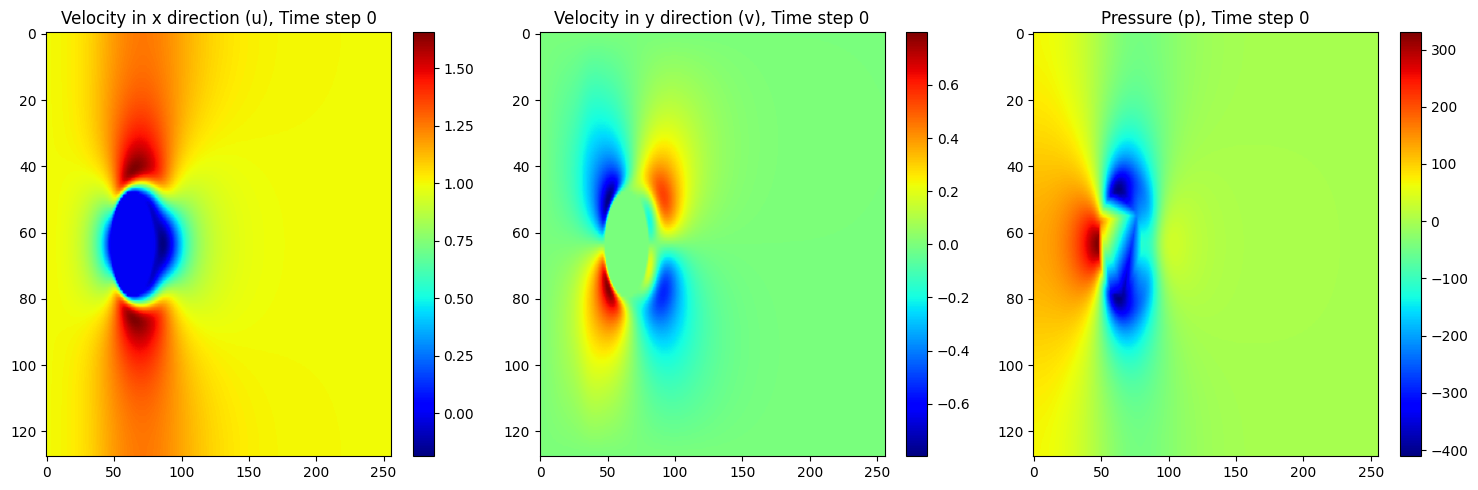

In [4]:
import matplotlib.pyplot as plt

# Visualize one slice of u, v, and p (taking the first time instance as an example)
time_step = 0  # Adjust this to visualize different timesteps

# Velocity in x direction (u), y direction (v), and pressure (p)
u_slice = u[:, :, time_step]
v_slice = v[:, :, time_step]
p_slice = p[:, :, time_step]

# Create the plot
plt.figure(figsize=(15, 5))

# Plot velocity in x direction (u)
plt.subplot(1, 3, 1)
plt.imshow(u_slice, cmap='jet', aspect='auto')
plt.colorbar()
plt.title(f'Velocity in x direction (u), Time step {time_step}')

# Plot velocity in y direction (v)
plt.subplot(1, 3, 2)
plt.imshow(v_slice, cmap='jet', aspect='auto')
plt.colorbar()
plt.title(f'Velocity in y direction (v), Time step {time_step}')

# Plot pressure (p)
plt.subplot(1, 3, 3)
plt.imshow(p_slice, cmap='jet', aspect='auto')
plt.colorbar()
plt.title(f'Pressure (p), Time step {time_step}')

# Show the plots
plt.tight_layout()
plt.show()


In [5]:
# Min-max normalization function
def min_max_normalize(data):
    min_val = np.min(data)
    max_val = np.max(data)
    normalized_data = (data - min_val) / (max_val - min_val)
    return normalized_data

# Normalize u, v, and p
u_normalized = min_max_normalize(u)
v_normalized = min_max_normalize(v)
p_normalized = min_max_normalize(p)

print("Data normalized using Min-Max Normalization")


Data normalized using Min-Max Normalization


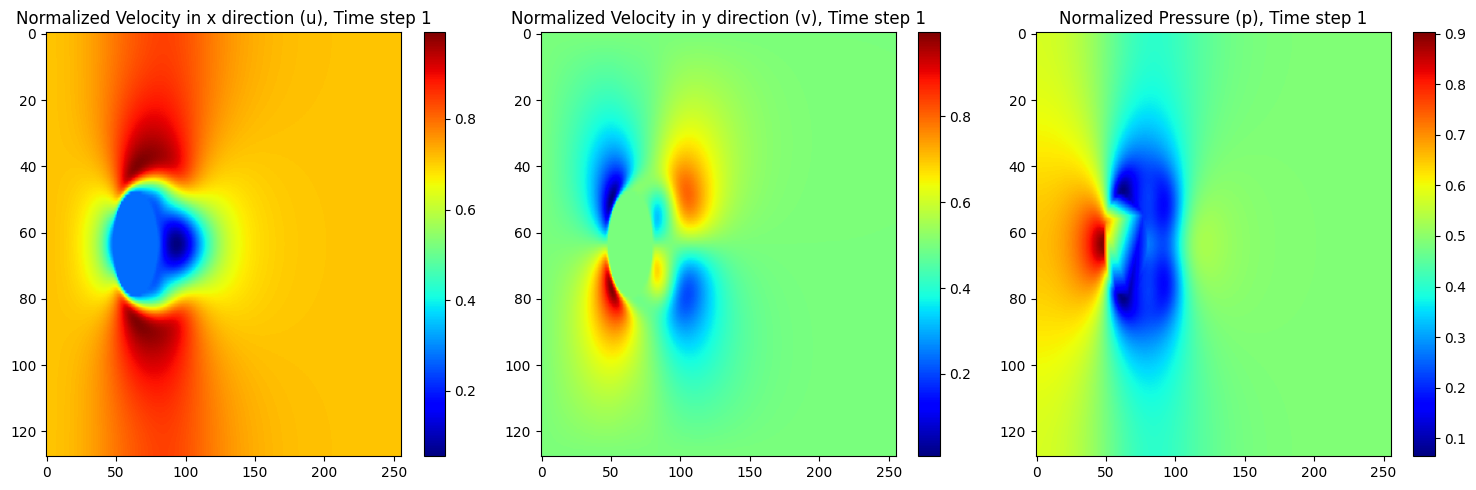

In [15]:
# Visualize the normalized data
plt.figure(figsize=(15, 5))
time_step = 1
# Plot normalized velocity in x direction (u)
plt.subplot(1, 3, 1)
plt.imshow(u_normalized[:, :, time_step], cmap='jet', aspect='auto')
plt.colorbar()
plt.title(f'Normalized Velocity in x direction (u), Time step {time_step}')

# Plot normalized velocity in y direction (v)
plt.subplot(1, 3, 2)
plt.imshow(v_normalized[:, :, time_step], cmap='jet', aspect='auto')
plt.colorbar()
plt.title(f'Normalized Velocity in y direction (v), Time step {time_step}')

# Plot normalized pressure (p)
plt.subplot(1, 3, 3)
plt.imshow(p_normalized[:, :, time_step], cmap='jet', aspect='auto')
plt.colorbar()
plt.title(f'Normalized Pressure (p), Time step {time_step}')

plt.tight_layout()
plt.show()


In [9]:
import matplotlib.pyplot as plt
import imageio
import numpy as np
import os

# Set up the relative path for the Visualizations folder
output_dir = './Visualizations/'

# Ensure the Visualizations folder exists
os.makedirs(output_dir, exist_ok=True)

# Function to create a GIF from numpy data
def create_gif(u_data, v_data, p_data, output_file):
    frames = []
    
    # Loop through all timesteps to generate frames
    for time_step in range(u_data.shape[2]):
        # Create a figure
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        # Plot velocity in x direction (u)
        im1 = axes[0].imshow(u_data[:, :, time_step], cmap='jet', aspect='auto')
        axes[0].set_title(f'Velocity in x direction (u), Timestep {time_step}')
        fig.colorbar(im1, ax=axes[0])
        
        # Plot velocity in y direction (v)
        im2 = axes[1].imshow(v_data[:, :, time_step], cmap='jet', aspect='auto')
        axes[1].set_title(f'Velocity in y direction (v), Timestep {time_step}')
        fig.colorbar(im2, ax=axes[1])
        
        # Plot pressure (p)
        im3 = axes[2].imshow(p_data[:, :, time_step], cmap='jet', aspect='auto')
        axes[2].set_title(f'Pressure (p), Timestep {time_step}')
        fig.colorbar(im3, ax=axes[2])
        
        # Save the figure to memory
        fig.tight_layout()
        fig.canvas.draw()
        
        # Convert plot to an image and append to frames list
        frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        frame = frame.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        frames.append(frame)
        
        # Close the figure to save memory
        plt.close(fig)
    
    # Save frames as a GIF
    imageio.mimsave(output_file, frames, fps=5)  # Adjust FPS as needed
    print(f"GIF saved to: {output_file}")

# Path to save the GIF (relative path)
output_gif_file = os.path.join(output_dir, 'navier_stokes_simulation.gif')

# Call the function to create a GIF
create_gif(u_normalized, v_normalized, p_normalized, output_gif_file)


/tmp/ipykernel_223262/881299036.py:41: MatplotlibDeprecationWarning: The tostring_rgb function was deprecated in Matplotlib 3.8 and will be removed two minor releases later. Use buffer_rgba instead.
  frame = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')


GIF saved to: ./Visualizations/navier_stokes_simulation.gif


In [38]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import os

class NavierStokesDataset(Dataset):
    def __init__(self, data_dir, future_steps=1):
        """
        data_dir: Path to the directory with the .npy files.
        future_steps: Number of timesteps in the future the model will predict.
        """
        self.data_dir = data_dir
        self.files = sorted([os.path.join(data_dir, f) for f in os.listdir(data_dir) if f.endswith('.npy')])
        self.future_steps = future_steps
    
    def __len__(self):
        return len(self.files)
    
    def __getitem__(self, idx):
        # Load the numpy array for the simulation instance
        data = np.load(self.files[idx])
        
        # Convert the numpy array to a PyTorch tensor
        # Correct the permutation to: (timesteps, channels, height, width)
        u = torch.tensor(data[:, :, 0::3], dtype=torch.float32).permute(2, 0, 1)  # Velocity in x direction
        v = torch.tensor(data[:, :, 1::3], dtype=torch.float32).permute(2, 0, 1)  # Velocity in y direction
        p = torch.tensor(data[:, :, 2::3], dtype=torch.float32).permute(2, 0, 1)  # Pressure

        # Concatenate along the channel dimension to form (timesteps, channels, height, width)
        data_tensor = torch.stack([u, v, p], dim=1)
        
        # Initial condition (ic) is the first timestep
        ic = data_tensor[0]  # shape: (channels, height, width)
        
        # Prepare the target sequence (ground truth)
        # Ground truth is the sequence from timestep 1 to the second-to-last timestep
        target = data_tensor[1:-self.future_steps]  # shape: (timesteps - future_steps, channels, height, width)
        
        # t0 is the starting time, t1 is the sequence of time points
        t0 = torch.tensor(0.0)
        t1 = torch.linspace(0, 2, steps=data_tensor.shape[0])[:-self.future_steps]  # Adjust time to exclude last future steps
        
        return ic, t0, t1, target  # Return the initial condition, t0, t1, and the future ground truth sequence

# Path to your data directory
data_dir = '/project/vil_baek/data/physics/original_ns/Navier-Stokes'

# Create an instance of the dataset with `future_steps=1` for single timestep prediction
navier_stokes_dataset = NavierStokesDataset(data_dir, future_steps=1)

# Create a DataLoader for batching
batch_size = 1  # Adjust batch size as needed
data_loader = DataLoader(navier_stokes_dataset, batch_size=batch_size, shuffle=True)


In [39]:
# Example usage of DataLoader with the PARCv2 model
for ic, t0, t1, data_tensor in data_loader:
    # Print the shape of the tensors
    print(f"Initial condition (ic) shape: {ic.shape}")
    print(f"t0 shape: {t0.shape}")
    print(f"t1 shape: {t1.shape}")
    print(f"Full data sequence shape: {data_tensor.shape}")
    
    # Break after one batch to avoid printing too much
    break


Initial condition (ic) shape: torch.Size([1, 3, 128, 256])
t0 shape: torch.Size([1])
t1 shape: torch.Size([1, 38])
Full data sequence shape: torch.Size([1, 37, 3, 128, 256])


Initial condition (ic) shape: torch.Size([1, 3, 128, 256])
t0 shape: torch.Size([1])
t1 shape: torch.Size([1, 35])
Full data sequence shape: torch.Size([1, 34, 3, 128, 256])


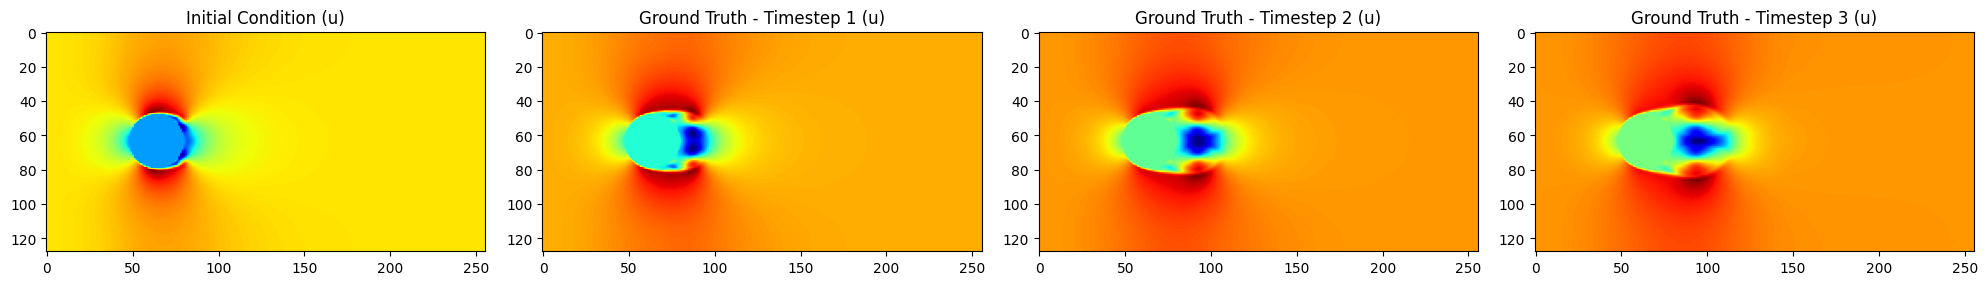

In [23]:
import matplotlib.pyplot as plt

# Example usage of DataLoader with the PARCv2 model
for ic, t0, t1, data_tensor in data_loader:
    # Print the shape of the tensors
    print(f"Initial condition (ic) shape: {ic.shape}")
    print(f"t0 shape: {t0.shape}")
    print(f"t1 shape: {t1.shape}")
    print(f"Full data sequence shape: {data_tensor.shape}")
    
    # Visualize initial condition and first few timesteps of ground truth
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))

    # Plot initial condition for the first sample in the batch (u, v, p channels)
    axes[0].imshow(ic[0, 0].cpu(), cmap='jet')  # u channel
    axes[0].set_title('Initial Condition (u)')

    # Plot first timestep of the ground truth sequence
    axes[1].imshow(data_tensor[0, 0, 0].cpu(), cmap='jet')  # u channel, timestep 1
    axes[1].set_title('Ground Truth - Timestep 1 (u)')

    # Plot second timestep of the ground truth sequence
    axes[2].imshow(data_tensor[0, 1, 0].cpu(), cmap='jet')  # u channel, timestep 2
    axes[2].set_title('Ground Truth - Timestep 2 (u)')

    # Plot third timestep of the ground truth sequence
    axes[3].imshow(data_tensor[0, 2, 0].cpu(), cmap='jet')  # u channel, timestep 3
    axes[3].set_title('Ground Truth - Timestep 3 (u)')

    plt.tight_layout()
    plt.show()

    # Break after one batch to avoid printing too much
    break


In [40]:
print(t0)

tensor([0.])


In [27]:
print(t1)

tensor([[0.0000, 0.0526, 0.1053, 0.1579, 0.2105, 0.2632, 0.3158, 0.3684, 0.4211,
         0.4737, 0.5263, 0.5789, 0.6316, 0.6842, 0.7368, 0.7895, 0.8421, 0.8947,
         0.9474, 1.0000, 1.0526, 1.1053, 1.1579, 1.2105, 1.2632, 1.3158, 1.3684,
         1.4211, 1.4737, 1.5263, 1.5789, 1.6316, 1.6842, 1.7368, 1.7895]])
